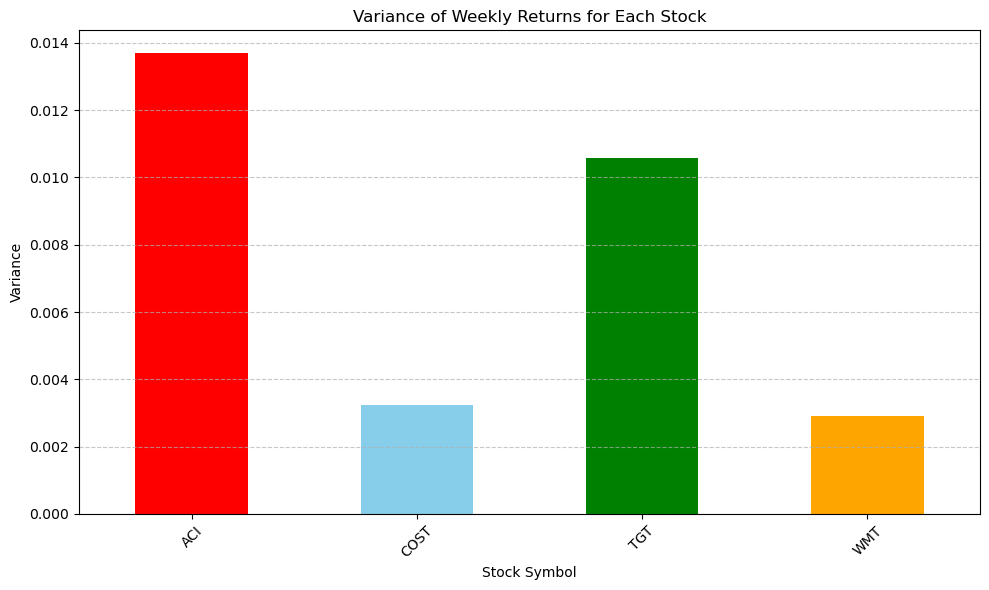

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the daily stock data from the CSV file
stock_data = pd.read_csv('../data/combined_data_with_symbol.csv')

# Convert the date column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Calculate daily returns
stock_data['Daily_Return'] = stock_data.groupby('Symbol')['Close'].pct_change()

# Compute variance of weekly returns for each stock
daily_return_variance = stock_data.groupby('Symbol')['Daily_Return'].var()

# Define colors for bars
colors = ['red', 'skyblue', 'green', 'orange']

# Plotting
plt.figure(figsize=(10, 6))
daily_return_variance.plot(kind='bar', color=colors)
plt.title('Variance of Weekly Returns for Each Stock')
plt.xlabel('Stock Symbol')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('../output/weekly variance.png')

plt.show()

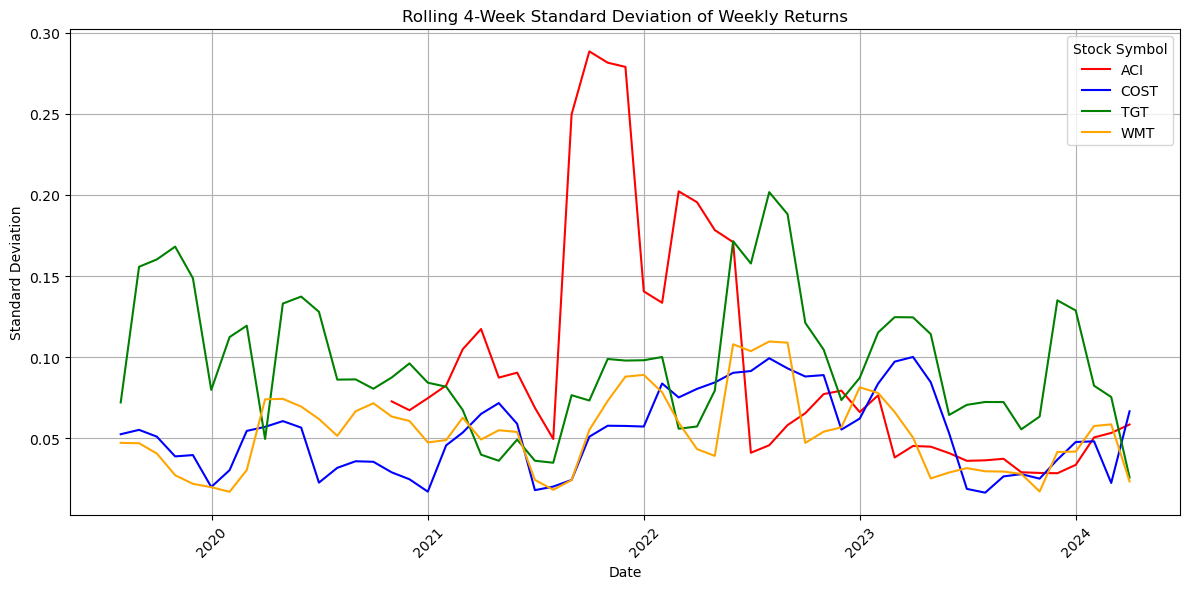

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the weekly stock data from the CSV file
stock_data = pd.read_csv('../data/combined_data_with_symbol.csv')

# Convert the date column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Calculate weekly returns
stock_data['Weekly_Return'] = stock_data.groupby('Symbol')['Close'].pct_change()

# Define the rolling window size (4 weeks)
rolling_window = 4  # Four weeks of data

# Calculate rolling standard deviation for each stock
rolling_std = stock_data.groupby('Symbol')['Weekly_Return'].rolling(window=rolling_window).std()

# Unstack the DataFrame to have each stock as a separate column
rolling_std_unstacked = rolling_std.unstack(level=0)

# Plotting
plt.figure(figsize=(12, 6))
for column in rolling_std_unstacked.columns:
    color = 'red' if column == 'ACI' else 'blue' if column == 'COST' else 'green' if column == 'TGT' else 'orange'
    plt.plot(stock_data['Date'], rolling_std_unstacked[column], label=column, color=color)

plt.title('Rolling 4-Week Standard Deviation of Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(title='Stock Symbol')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()